#Preliminary operations

##Import libraries

In [ ]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.dummy import DummyClassifier

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# stats
from scipy import stats
#scaling, normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# train, test, split
from sklearn.model_selection import train_test_split
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
# repeated stratified kfold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
# randomized and grid search cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Dummy clf
from sklearn.dummy import DummyClassifier

##Mount Google Drive

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Import datasets

In [ ]:
# import dataframe (without outliers)
df = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final.xlsx", index_col="Unnamed: 0")
df_emph_high = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final_emph_high.xlsx", index_col="Unnamed: 0")
df_emph_low = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final_emph_low.xlsx", index_col="Unnamed: 0")

In [ ]:
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'statement',
       'repetition', 'actor', 'sex', 'channels', 'length_ms', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_max', 'sc_mean', 'sc_std',
       'sc_min', 'sc_max', 'sc_kur', 'stft_mean', 'stft_std', 'stft_min',
       'stft_kur', 'mean', 'kur', 'skew', 'loudness', 'emotion_type'],
      dtype='object')

In [ ]:
# get data columns
df_data = df.loc[:, "length_ms":"skew"]
df_data_emph_high = df_emph_high.loc[:, "length_ms":"skew"]
df_data_emph_low = df_emph_low.loc[:, "length_ms":"skew"]

# get values from data columns
X = df_data.values
X_emph_high = df_data_emph_high.values
X_emph_low = df_data_emph_low.values

# get emotion lables from each emphasis group
y_emotion = df["emotion"]
y_emotion_emph_high = df_emph_high["emotion"]
y_emotion_emph_low = df_emph_low["emotion"]

# get emotion type from each emphasis group
y_emtype = df["emotion_type"]
y_emtype_emph_high = df_emph_high["emotion_type"]
y_emtype_emph_low = df_emph_low["emotion_type"]

##Standardization

In [ ]:
# get StandardScaler
std_scaler = StandardScaler()

# normalise each emphasis group with StandardScaler
X_std = std_scaler.fit_transform(X)
X_std_emph_high = std_scaler.fit_transform(X_emph_high)
X_std_emph_low = std_scaler.fit_transform(X_emph_low)

# get MinMaxScaler
mima_scaler = MinMaxScaler()

# normalise each emphasis group with MinMaxScaler
X_mima = mima_scaler.fit_transform(X)
X_mima_emph_high = mima_scaler.fit_transform(X_emph_high)
X_mima_emph_low = mima_scaler.fit_transform(X_emph_low)

## Partitioning for emotion

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_emotion, 
    test_size=0.2, 
    random_state=0,
    stratify = y_emotion 
)

In [ ]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X=None, y=y_train))
print(dummy_clf.score(X=None, y=y_test))

0.14737378888322283
0.1425661914460285


COSE DA FARE PER LA CLASSIFICAZIONE (PER OGNI MODELLO):

Le cose che facciamo le facciamo per tutti e 3 i dataset (all emphasis, high emphasis e low emphasis). Facciamo la classificazione per le due variabili che abbiamo usato anche nel Clustering: "emotions" e "emotional_type" (strong, weak).

* Dividere in "training_set" (80%) e "test_set" (20%)
* Usare il "training_set" per fare la Cross_Validation stratificata (Stratified Cross Validation) in 10 parti per testare gli iperparametri, con Grid-Search se non va troppo lento; se va lento usiamo Randomized-Search.
* Testare la classificazione su tutte e due le variabili dette prima, per ognuno dei 3 dataset che abbiamo
* Misuarci tutte le metriche possibili e immaginabili che ha fatto vedere lo Spinnnato in laboratorio
* Fine, basta, boh. Bona cisi e se un cisi bona

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint, loguniform

In [ ]:
%%time
#GRID SEARCH
params = {
            'priors': [None],
            'var_smoothing': np.logspace(0,-9, num=100),
         }

gaussian_nb_grid = GridSearchCV(
    GaussianNB(), 
    param_grid=params, 
    n_jobs=-1, 
    cv=10, 
    verbose=5
)
gaussian_nb_grid.fit(X_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(gaussian_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(gaussian_nb_grid.best_params_))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Accuracy Through Grid Search : 0.359
Best Parameters : {'priors': None, 'var_smoothing': 2.310129700083158e-09}

CPU times: user 479 ms, sys: 31.4 ms, total: 511 ms
Wall time: 6.81 s


In [ ]:
clf = GaussianNB(priors= None, var_smoothing= 2.310129700083158e-09)

In [ ]:
%%time
clf.fit(X_train, y_train)

CPU times: user 11.8 ms, sys: 33 µs, total: 11.9 ms
Wall time: 35.3 ms


GaussianNB(var_smoothing=2.310129700083158e-09)

In [ ]:
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

0.35234215885947046


In [ ]:
print(gaussian_nb_grid.best_params_, gaussian_nb_grid.best_score_)

{'priors': None, 'var_smoothing': 2.310129700083158e-09} 0.35902569149487207


In [ ]:
#parametri attuali
clf.get_params(deep=True)

{'priors': None, 'var_smoothing': 2.310129700083158e-09}

In [ ]:
clf.score(X_test, y_test)

0.35234215885947046

In [ ]:
results = pd.DataFrame(gaussian_nb_grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008220,0.001988,0.001634,0.000077,None,1.0,"{'priors': None, 'var_smoothing': 1.0}",0.208122,0.250000,0.219388,0.209184,0.214286,0.193878,0.224490,0.219388,0.204082,0.204082,0.214690,0.014556,100
1,0.007402,0.001019,0.001739,0.000441,None,0.811131,"{'priors': None, 'var_smoothing': 0.8111308307...",0.208122,0.255102,0.219388,0.209184,0.219388,0.193878,0.224490,0.219388,0.204082,0.204082,0.215710,0.015864,99
2,0.008283,0.002107,0.001593,0.000067,None,0.657933,"{'priors': None, 'var_smoothing': 0.6579332246...",0.208122,0.255102,0.219388,0.204082,0.219388,0.204082,0.224490,0.219388,0.204082,0.204082,0.216220,0.015051,97
3,0.007265,0.001408,0.001677,0.000301,None,0.53367,"{'priors': None, 'var_smoothing': 0.5336699231...",0.213198,0.265306,0.224490,0.204082,0.219388,0.204082,0.224490,0.209184,0.198980,0.209184,0.217238,0.018017,95
4,0.008931,0.003320,0.001580,0.000041,None,0.432876,"{'priors': None, 'var_smoothing': 0.4328761281...",0.213198,0.260204,0.224490,0.198980,0.224490,0.209184,0.224490,0.204082,0.198980,0.209184,0.216728,0.017283,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.008184,0.003589,0.001959,0.000687,None,0.0,"{'priors': None, 'var_smoothing': 2.3101297000...",0.309645,0.392857,0.387755,0.260204,0.352041,0.357143,0.382653,0.346939,0.387755,0.413265,0.359026,0.043241,1
96,0.015838,0.004139,0.003144,0.002430,None,0.0,"{'priors': None, 'var_smoothing': 1.8738174228...",0.309645,0.397959,0.387755,0.260204,0.352041,0.352041,0.377551,0.341837,0.392857,0.408163,0.358005,0.043394,2
97,0.010353,0.006314,0.001765,0.000461,None,0.0,"{'priors': None, 'var_smoothing': 1.5199110829...",0.309645,0.387755,0.392857,0.255102,0.346939,0.346939,0.382653,0.336735,0.392857,0.403061,0.355454,0.044172,7
98,0.007806,0.002267,0.003854,0.005170,None,0.0,"{'priors': None, 'var_smoothing': 1.2328467394...",0.309645,0.392857,0.392857,0.255102,0.346939,0.357143,0.382653,0.336735,0.392857,0.408163,0.357495,0.045020,4


#### Performance evaluation

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

# plot_cumulative_gain and plot_lift_curve only work in a binary classification case

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.49      0.61      0.54        75
        calm       0.53      0.49      0.51        75
     disgust       0.29      0.26      0.27        39
     fearful       0.38      0.21      0.27        75
       happy       0.29      0.29      0.29        75
     neutral       0.29      0.29      0.29        38
         sad       0.29      0.12      0.17        75
   surprised       0.21      0.56      0.31        39

    accuracy                           0.35       491
   macro avg       0.35      0.36      0.33       491
weighted avg       0.36      0.35      0.34       491



In [ ]:
y_test_pred_proba = clf.predict_proba(X_test)

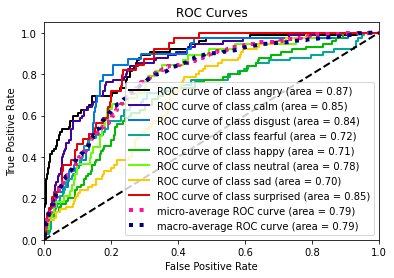

0.7902233711169245


In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

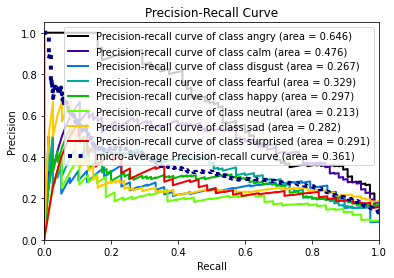

In [ ]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

#### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross = np.array(cross_val_score(clf, X_train, y_train, cv=10))
print(cross)
print("media", np.mean(cross))
print("deviazione std.", np.std(cross))

[0.30964467 0.39285714 0.3877551  0.26020408 0.35204082 0.35714286
 0.38265306 0.34693878 0.3877551  0.41326531]
media 0.35902569149487207
deviazione std. 0.04324134190350691


In [ ]:
# Dummy clf
from sklearn.dummy import DummyClassifier
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.1425661914460285


##HIGH EMPHASIS

In [ ]:
# replacing training_set 
# (removing common samples between training_set and test_set)
X_train_index = df_data_emph_high.index
X_train_index = np.setdiff1d(X_train_index, y_test.index)

X_train = df_data_emph_high.loc[X_train_index].values
y_train = y_emotion_emph_high[X_train_index]

In [ ]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.12423625254582485


In [ ]:
%%time
#GRID SEARCH
params = {
            'priors': [None],
            'var_smoothing': np.logspace(0,-9, num=100),
         }

gaussian_nb_grid = GridSearchCV(
    GaussianNB(), 
    param_grid=params, 
    n_jobs=-1, 
    cv=10, 
    verbose=5
)
gaussian_nb_grid.fit(X_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(gaussian_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(gaussian_nb_grid.best_params_))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Accuracy Through Grid Search : 0.546
Best Parameters : {'priors': None, 'var_smoothing': 1e-07}

CPU times: user 533 ms, sys: 24.2 ms, total: 558 ms
Wall time: 4 s


In [ ]:
clf = GaussianNB(priors= None, var_smoothing= 1e-07)

In [ ]:
%%time
clf.fit(X_train, y_train)

CPU times: user 4.65 ms, sys: 0 ns, total: 4.65 ms
Wall time: 5.12 ms


GaussianNB(var_smoothing=1e-07)

In [ ]:
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

0.553030303030303


In [ ]:
print(gaussian_nb_grid.best_params_, gaussian_nb_grid.best_score_)

{'priors': None, 'var_smoothing': 1e-07} 0.5464240790655884


In [ ]:
clf.score(X_test, y_test)

0.553030303030303

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.82      0.84      0.83        38
        calm       0.54      0.64      0.59        50
     disgust       0.60      0.47      0.53        19
     fearful       0.61      0.45      0.52        38
       happy       0.58      0.57      0.58        37
     neutral       0.29      0.40      0.33        25
         sad       0.38      0.21      0.27        38
   surprised       0.55      0.89      0.68        19

    accuracy                           0.55       264
   macro avg       0.55      0.56      0.54       264
weighted avg       0.55      0.55      0.54       264



In [ ]:
y_test_pred = clf.predict_proba(X_test)

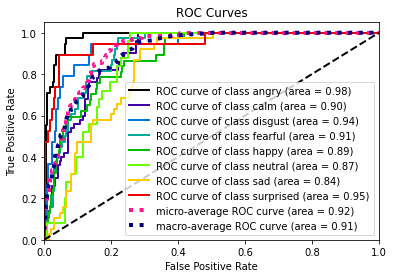

0.9092919966353615


In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

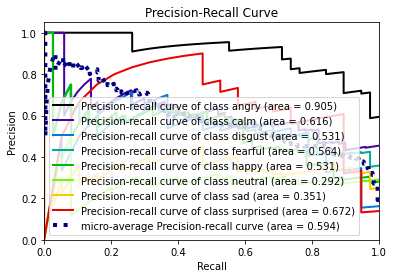

In [ ]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

#### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross = np.array(cross_val_score(clf, X_train, y_train, cv=10))
print(cross)
print("media", np.mean(cross))
print("deviazione std.", np.std(cross))

[0.53773585 0.58490566 0.5754717  0.55660377 0.48571429 0.58095238
 0.54285714 0.52380952 0.47619048 0.6       ]
media 0.5464240790655884
deviazione std. 0.039634416677759986


In [ ]:
# Dummy clf
from sklearn.dummy import DummyClassifier
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.12878787878787878


##LOW EMPHASIS

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_emph_low, 
    y_emotion_emph_low, 
    test_size=0.2, 
    random_state=0,
    stratify = y_emotion_emph_low 
)

In [ ]:
%%time
#GRID SEARCH
params = {
            'priors': [None],
            'var_smoothing': np.logspace(0,-9, num=100),
         }

gaussian_nb_grid = GridSearchCV(
    GaussianNB(), 
    param_grid=params, 
    n_jobs=-1, 
    cv=10, 
    verbose=5
)
gaussian_nb_grid.fit(X_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(gaussian_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(gaussian_nb_grid.best_params_))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Accuracy Through Grid Search : 0.362
Best Parameters : {'priors': None, 'var_smoothing': 1.873817422860383e-08}

CPU times: user 356 ms, sys: 15.5 ms, total: 371 ms
Wall time: 3.66 s


In [ ]:
clf = GaussianNB(priors= None, var_smoothing= 1.873817422860383e-08)

In [ ]:
%%time
clf.fit(X_train, y_train)

CPU times: user 5.13 ms, sys: 965 µs, total: 6.1 ms
Wall time: 5.82 ms


GaussianNB(var_smoothing=1.873817422860383e-08)

In [ ]:
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

0.3524229074889868


In [ ]:
print(gaussian_nb_grid.best_params_, gaussian_nb_grid.best_score_)

{'priors': None, 'var_smoothing': 1.873817422860383e-08} 0.36158730158730157


In [ ]:
clf.score(X_test, y_test)

0.3524229074889868

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.62      0.61      0.61        38
        calm       0.40      0.48      0.44        25
     disgust       0.38      0.42      0.40        19
     fearful       0.44      0.18      0.26        38
       happy       0.25      0.24      0.24        38
     neutral       0.00      0.00      0.00        13
         sad       0.24      0.27      0.25        37
   surprised       0.27      0.58      0.37        19

    accuracy                           0.35       227
   macro avg       0.32      0.35      0.32       227
weighted avg       0.36      0.35      0.34       227



In [ ]:
y_test_pred = clf.predict_proba(X_test)

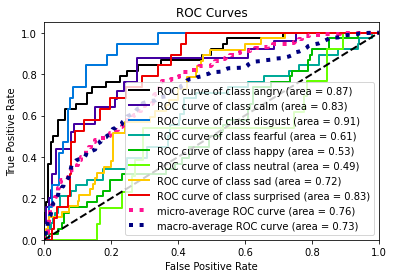

0.7257994687245831


In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

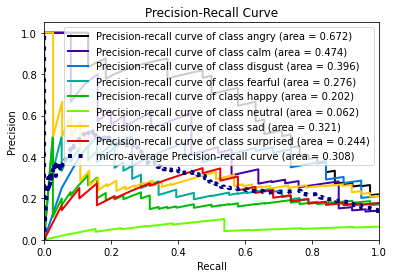

In [ ]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

#### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross = np.array(cross_val_score(clf, X_train, y_train, cv=10))
print(cross)
print("media", np.mean(cross))
print("deviazione std.", np.std(cross))

[0.2967033  0.37362637 0.42857143 0.36263736 0.35164835 0.32967033
 0.42857143 0.38888889 0.3        0.35555556]
media 0.36158730158730157
deviazione std. 0.043614163614163606


In [ ]:
# Dummy clf
from sklearn.dummy import DummyClassifier
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.16299559471365638
